<img src = '../images/ATUlogo.png'>

# Machine Learning and Statistics 2023 Assessment 

## 1. Overview 
<b> 1.1. Machine Learning 

The concept of machine learning that it is a type of artifical inteligence that uses algorithms to become increaslingly accurate overtime without the influence of humans. As an alternative to hardcoding an outcome, machine learning uses data from previous interactions to form the bases of a decision. [1] Machine Learning helps to automate processes, reduce errors, improve decision making and increase operational efficiences [2]. 
    
Mo Gawdat, entrepreneur and former chief Business Officer at Google[X] discussed his opinion on machine learning on a 'The Diary of a CEO' podcast with Steven Bartlett. Within this podcast he highlighted the many uses of machine learning and AI from it's algorithms in social media such as instagram to ensure newfeeds are taylored for their users etc. but he also warned that AI has the potential to become 'a billion times smarter than humans' if it continues to grow at the rate it is growing at the moment and this fact 'frightened' him. Mo stated that machines learn from humans. If humans display negative traits online the machine will learn these negative traits e.g. Let's say Trump writes a post on twitter, one user (person a) responds with a negative comment which in turn sparks another twitter member (person b) to defend the origional post with another agruementative comment which inspires a third member (person c) to comment that everyone within the twitter chain is being ridiculous. From this data one way the machines could interperate this  is that person A doesn't like Trump, and person B doesn't like person A, and person C doesn't like person A+B and in turn all of humanity do not get along. Mo Predicts that machines will develop emotions, morals, and a code of ethics but these ethics must first be taught to the machine by humans [3.]
    

<b> 1.2. What is tensorflow
    
<img src = '../images/TensorFlow.png' style="width:500px;height:200px;">
    
Tensorflow is an end to end open-source platform that allows developers to create datadflow graphs and structures that interprets how data moves through a graph[5.] It plays an important role in text-based applications across multuple platforms. It is the main tool used for Facebooks image recognition and is used in Apple's Siri voice search [6] . 
    
All computers that use tensorflow utlize tensors i.e. a matrix of n-dimensions which signify types of data. Data within a tensor have the same data type and a known shape which is the dimensions of the matrix. [6] Tensors are essentially objects with three properties:
    
    i) A unique name 
    ii) A dimension
    iii) A data type 
    
Tensorflow manipulates the tensors to support the compuations within a graph. 
    
    
Tensorflow is compatable with both python, C++, Java and Go. 
    
<img src = '../images/tfconnect.png' style="width:800px;height:500px;">
    

<b> 1.2. What is keras
    
Keras is a highly flexible framework that follows progressive disclosure of complexity i.e. abstraction that allows for an easier end user interface. It is a high productive API for solving machine learning problem [4.] Keras also utilizes python for the implementation of neutral networks [7]. TensorFlow utilized Keras as a high-level API to perform  fast learning with its inbuilt modules for computations. In adiition, interactions with tensors, graphs, sessions, can be cutomizable with Tensorflow Core API, increasing flexibility and control. 
    
Models are built in keras via the following steps:
<img src = '../images/buildkeras.png' style="width:800px;height:200px;">

1. A network is identified: Layers in the model are defined and the interactions between each layer are established. There are two main types of models in Keras:
    i) Sequential 
    ii ) Functional models
    
2. Compile a network: The next step is to convert the network into a form that can be understood and interpreted by the machine. The model.compile() method is utlized to carry out this function. In order to convert the network the following must be defined:
    i) Loss function 
    ii) Optimizer 
    iii) Accuracy Metrics 
    
4. Mold the network: The model is then fitted to the data after it is compliled which in turn trains the model on the data inputted. 
    
5. Evaluate the network: After the data has been inpuuted into the model the model is evaluted for error. 
6. Predictions: The model.predict() is a function that can be used to make predictions on the data fitted to the model. [7,8]
    
    


## Calculations: 

In [6]:
# Import packages - NOTE: I Could not Run Tensorflow on my personal computer due to IOS type, python package nothing on lecture content or stack overflow could resolve. Also ran into memory issues and therefore ran this on anohter device and transferred over to my personal computer for upload. 
import numpy as np
import pandas as pd
#import tensorflow.keras as keras
#from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [15]:
#Load the data
url_root = "https://raw.githubusercontent.com/numenta/NAB/master/data/"
NoAnomaly_url_suffix = "artificialNoAnomaly/art_daily_small_noise.csv"
WithAnomaly_url_suffix = "artificialWithAnomaly/art_daily_jumpsup.csv"

NoAnomaly_url = url_root + NoAnomaly_url_suffix

NoAnomaly = pd.read_csv(NoAnomaly_url, parse_dates=True, index_col="timestamp")


WithAnomaly_url = url_root + WithAnomaly_url_suffix
WithAnomaly = pd.read_csv(WithAnomaly_url, parse_dates=True, index_col="timestamp")

In [16]:
# View Data 
print(NoAnomaly.head())
print(WithAnomaly.head())

                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120
                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


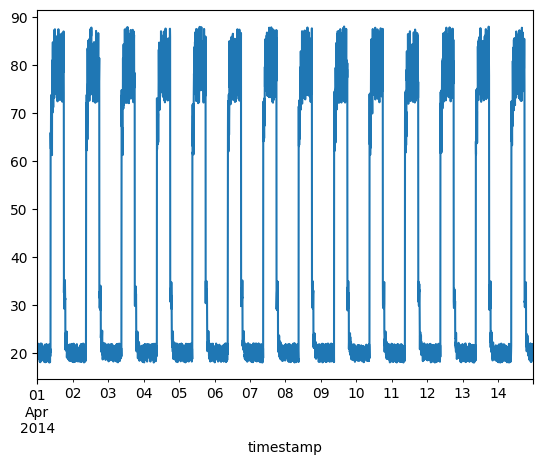

In [17]:
#Visualize the data: - Timeseries data without anomalies
    
fig, ax = plt.subplots()
NoAnomaly.plot(legend=False, ax=ax)
plt.show()

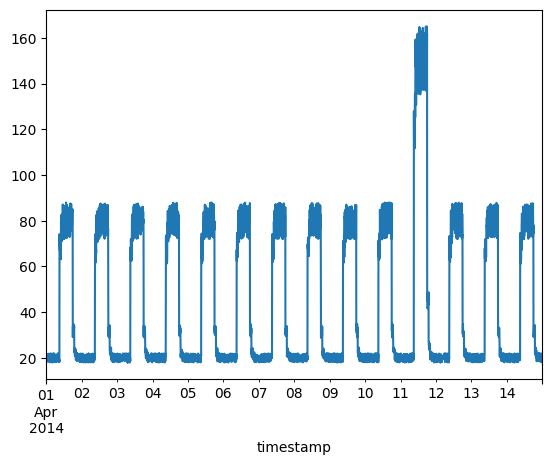

In [18]:
fig, ax = plt.subplots()
WithAnomaly.plot(legend=False, ax=ax)
plt.show()

In [11]:
# Normalize and save the mean and std we get,
# for normalizing test data.
training_mean = NoAnomaly.mean()
training_std = NoAnomaly.std()
training_value = (NoAnomaly - training_mean) / training_std
print("Number of training samples:", len(training_value))

Number of training samples: 4032


In [12]:
#Create sequences
TIME_STEPS = 288

# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(training_value.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (3745, 288, 1)


In [ ]:
#Build a model 
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Dropout(rate=0.2),
        layers.Conv1D(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Conv1DTranspose(filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Dropout(rate=0.2),layers.Conv1DTranspose(filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
        layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

In [ ]:
#Train the model
history = model.fit
(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")],
)

In [ ]:
#Plots
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

In [ ]:
# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()

In [ ]:
#Test data
test_value = (WithAnomaly - training_mean) / training_std
fig, ax = plt.subplots()

test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

In [ ]:
#Let's overlay the anomalies on the original test data plot.
subset = WithAnomaly.iloc[anomalous_data_indices]
fig, ax = plt.subplots()

WithAnomaly.plot(legend=False, ax=ax)
subset.plot(legend=False, ax=ax, color="r")

plt.show()

## References 
1. Machine learning definition: ets.com/learn/machine-learning/?gclid=Cj0KCQiAzeSdBhC4ARIsACj36uFQySuSveLUmbSyOow1qoMb4JMDRYZPdp3EIZ_p7hhARqyyWqcjWTAaAptTEALw_wcB
2. Uses of machine learning. https://www.sailpoint.com/identity-library/benefits-of-ai-and-machine-learning/?campaignid=11559254371&utm_source=google&utm_medium=cpc&utm_content=emea-bofu-all&ppgid=8416bb2f&cb={CACHEBUSTER}&utm_id=7012J000001FbaE&gclid=Cj0KCQiAzeSdBhC4ARIsACj36uH7qKR9dcyMB7XU0vERQ_4qOsgeazhH8POd3Mxhjxcr9c0_gq1Gbx0aAjZPEALw_wcB
3. The happiness expert Diary of a CEO with Mo Gawdat. 
4. What is Keras: https://keras.io/about/#:~:text=Keras%20is%20the%20high%2Dlevel,solutions%20with%20high%20iteration%20velocity.
5. Tensorflow documentation background on what is tensorflow:https://www.tensorflow.org/guide/keras/sequential_model
6. Uses of Tensorflow https://www.mygreatlearning.com/blog/what-is-tensorflow-machine-learning-library-explained/#:~:text=Being%20an%20Open%2DSource%20library,Apple's%20Siri%20for%20voice%20recognition.
7. Keras and why it's used https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras#what_is_keras
8. Building Models in Keras https://machinelearningmastery.com/three-ways-to-build-machine-learning-models-in-keras/